In [1]:
!pip install matplotlib wordcloud

     ---------------------------------------- 0.0/114.6 kB ? eta -:--:--
     -------------------------------------  112.6/114.6 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 114.6/114.6 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 60.9/60.9 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB 7.9 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/8.1 MB 10.9 MB/s eta 0:00:01
   -------- ------------------------------- 1.7/8.1 MB 13.2 MB/s eta 0:00:01
   ----------- ---------------------------- 2.4/8.1 MB 13.7 MB/s eta 0:00:01
   -------------- ------------------------- 3.0/8.1 MB 13.6 MB/s eta 0:00:01
   ---------------- ----------------------- 3.3/8.1 MB 13.3 MB/s eta 0:00:01
   --------------------- ------------------ 4.4/8.1 MB 13.9 MB/s eta 0:00:01
   -----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\Zero\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
import sys
print(sys.executable)

c:\Users\Zero\AppData\Local\Programs\Python\Python313\python.exe


In [13]:
import spacy
nlp = spacy.load("es_core_news_sm")

In [15]:
import re
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
nlp = spacy.load("es_core_news_sm")

In [ ]:
# Leer el contenido del archivo "El inspector Cambalache y el robo en el museo.txt"
try:
    with open("C:/Users/Zero/Documents/El inspector Cambalache y el robo en el museo.txt", "r", encoding="utf-8") as f:
        inspector_cambalache_robo = f.read()
    print("Se ha leído el archivo 'El inspector Cambalache y el robo en el museo.txt'")
except FileNotFoundError:
    print("Error: No se encontró el archivo 'El inspector Cambalache y el robo en el museo.txt'. Asegúrate de que el nombre del archivo sea correcto y esté en la ubicación correcta en Colab.")
except Exception as e:
    print(f"Ocurrió un error al leer 'El inspector Cambalache y el robo en el museo.txt': {e}")

# Leer el contenido del archivo "Los dos gemelos y la caja mágica.txt"
try:
    with open("C:/Users/Zero/Documents/Los dos gemelos y la caja mágica.txt", "r", encoding="utf-8") as f:
        gemelos_caja_magica = f.read()
    print("Se ha leído el archivo 'Los dos gemelos y la caja mágica.txt'")
except FileNotFoundError:
    print("Error: No se encontró el archivo 'Los dos gemelos y la caja mágica.txt'. Asegúrate de que el nombre del archivo sea correcto y esté en la ubicación correcta en Colab.")
except Exception as e:
    print(f"Ocurrió un error al leer 'Los dos gemelos y la caja mágica.txt': {e}")

Se ha leído el archivo 'El inspector Cambalache y el robo en el museo.txt'
Se ha leído el archivo 'Los dos gemelos y la caja mágica.txt'


Este fragmento de código intenta abrir y leer el contenido de dos archivos de texto: "El inspector Cambalache y el robo en el museo.txt" y "Los dos gemelos y la caja mágica.txt", usando bloques try-except para manejar posibles errores, como que alguno de los archivos no se encuentre. La función open() se utiliza en modo lectura con codificación UTF-8, mientras que f.read() extrae todo el texto y lo almacena en las variables inspector_cambalache_robo y gemelos_caja_magica. Si la lectura se realiza correctamente, el programa muestra un mensaje de confirmación para cada archivo; de lo contrario, captura el error y notifica al usuario. Los mensajes "Se ha leído el archivo 'El inspector Cambalache y el robo en el museo.txt'" y "Se ha leído el archivo 'Los dos gemelos y la caja mágica.txt'" confirman que ambos textos se cargaron correctamente y ya están disponibles para su posterior procesamiento.

In [29]:
import re

def normalizar_texto(texto):
    # Eliminar etiquetas HTML
    texto_sin_html = re.sub(r'<.*?>', '', texto)
    # Eliminar URLs
    texto_sin_urls = re.sub(r'http\S+|www\S+|https\S+', '', texto_sin_html)
    # Eliminar puntuación (dejando espacios)
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_sin_urls)
    # Eliminar emojis (esta es una expresión regular básica, puede haber casos más complejos)
    texto_sin_emojis = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\u2600-\u26FF\u2700-\u27BF]', '', texto_sin_puntuacion)
    # Eliminar espacios extra al principio, al final y entre palabras
    texto_normalizado = ' '.join(texto_sin_emojis.split())
    return texto_normalizado

# Normalizar el primer texto
texto_normalizado_Cambalache = normalizar_texto(inspector_cambalache_robo)

# Normalizar el segundo texto
texto_normalizado_Caja = normalizar_texto(gemelos_caja_magica)

print("Texto 'El inspector Cambalache y el robo en el museo' normalizado (primeros 50 caracteres):")
print(texto_normalizado_Cambalache[:50])
print("\nTexto 'Los dos gemelos y la caja mágica' normalizado (primeros 50 caracteres):")
print(texto_normalizado_Caja[:50])

Texto 'El inspector Cambalache y el robo en el museo' normalizado (primeros 50 caracteres):
Los dos gemelos y la caja mágica Érase una vez dos

Texto 'Los dos gemelos y la caja mágica' normalizado (primeros 50 caracteres):
Los dos gemelos y la caja mágica Érase una vez dos


Este código define una función llamada normalizar_texto que limpia y prepara un texto para análisis posterior. Primero elimina cualquier etiqueta HTML, luego quita URLs, puntuación y emojis mediante expresiones regulares. Después, elimina los espacios extra al inicio, al final y entre palabras para dejar el texto más uniforme. La función se aplica a dos variables, inspector_cambalache_robo y gemelos_caja_magica, que contienen los textos de los archivos previamente leídos, generando texto_normalizado_Cambalache y texto_normalizado_Caja. Finalmente, se imprimen los primeros 50 caracteres de cada texto ya normalizado para mostrar un ejemplo del resultado.


Palabras más frecuentes en 'El inspector Cambalache y el robo en el museo':
[('caja', 22), ('deseo', 12), ('miguelito', 11), ('hermano', 10), ('juanito', 10), ('mágico', 8), ('pedir', 5), ('egoísta', 4), ('gemelo', 3), ('hacer', 3), ('rabiar', 3), ('encontrar', 3), ('dejar', 3), ('brillar', 3), ('precioso', 3), ('acercar', 3), ('abrir', 3), ('querer', 3), ('habitación', 3), ('golosina', 3)]

Palabras más frecuentes en 'Los dos gemelos y la caja mágica':
[('caja', 22), ('deseo', 12), ('miguelito', 11), ('hermano', 10), ('juanito', 10), ('mágico', 8), ('pedir', 5), ('egoísta', 4), ('gemelo', 3), ('hacer', 3), ('rabiar', 3), ('encontrar', 3), ('dejar', 3), ('brillar', 3), ('precioso', 3), ('acercar', 3), ('abrir', 3), ('querer', 3), ('habitación', 3), ('golosina', 3)]


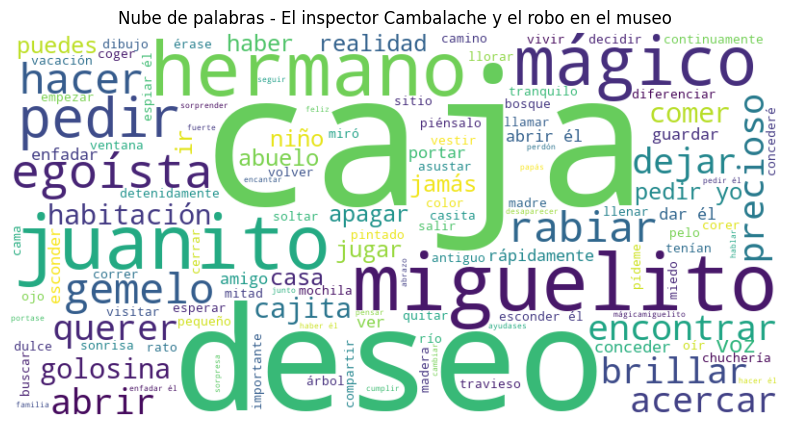

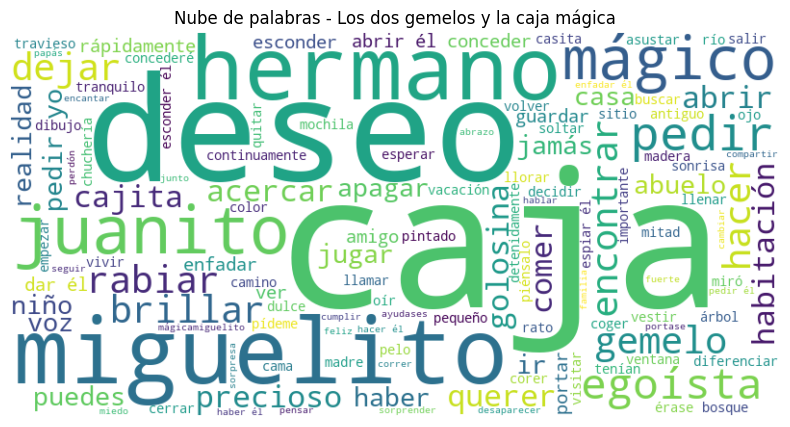


Posibles temas basados en las palabras más frecuentes:
'El inspector Cambalache y el robo en el museo': ['caja', 'deseo', 'miguelito', 'hermano', 'juanito']
'Los dos gemelos y la caja mágica': ['caja', 'deseo', 'miguelito', 'hermano', 'juanito']


In [30]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy

# Cargar el modelo de lenguaje en español
nlp = spacy.load("es_core_news_sm")

def procesar_texto_spacy(texto):
    doc = nlp(texto)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    return tokens

# Procesar ambos textos con spaCy
tokens_cambalache = procesar_texto_spacy(texto_normalizado_Cambalache)
tokens_caja = procesar_texto_spacy(texto_normalizado_Caja)

# Identificar las palabras más frecuentes
frecuencia_cambalache = Counter(tokens_cambalache)
palabras_frecuentes_cambalache = frecuencia_cambalache.most_common(20)
print("\nPalabras más frecuentes en 'El inspector Cambalache y el robo en el museo':")
print(palabras_frecuentes_cambalache)

frecuencia_caja = Counter(tokens_caja)
palabras_frecuentes_caja = frecuencia_caja.most_common(20)
print("\nPalabras más frecuentes en 'Los dos gemelos y la caja mágica':")
print(palabras_frecuentes_caja)

# Generar nubes de palabras
def generar_nube_palabras(frecuencia, nombre_archivo):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de palabras - {nombre_archivo}')
    plt.show()

generar_nube_palabras(frecuencia_cambalache, "El inspector Cambalache y el robo en el museo")
generar_nube_palabras(frecuencia_caja, "Los dos gemelos y la caja mágica")

# Reflexión sobre los temas (basado en las palabras más frecuentes - inicial)
print("\nPosibles temas basados en las palabras más frecuentes:")
print("'El inspector Cambalache y el robo en el museo':", [palabra for palabra, frecuencia in palabras_frecuentes_cambalache[:5]])
print("'Los dos gemelos y la caja mágica':", [palabra for palabra, frecuencia in palabras_frecuentes_caja[:5]])


Este código analiza y visualiza el contenido de dos textos utilizando spaCy y WordCloud. Primero, carga el modelo de lenguaje en español y define la función procesar_texto_spacy, que convierte el texto en tokens lematizados, eliminando palabras vacías, puntuación y espacios. Luego, procesa los textos normalizados de los archivos, generando listas de tokens (tokens_cambalache y tokens_caja). A continuación, calcula la frecuencia de cada palabra con Counter e imprime las 20 más comunes en cada texto. Después, genera nubes de palabras que muestran visualmente las palabras más frecuentes mediante la función generar_nube_palabras. Finalmente, hace una reflexión inicial sobre los posibles temas de los textos listando las cinco palabras más frecuentes de cada uno, dando una primera idea del contenido y enfoque de cada historia.


Sustantivos más frecuentes en 'El inspector Cambalache y el robo en el museo':
[('caja', 22), ('deseo', 12), ('hermano', 10), ('gemelo', 3), ('habitación', 3), ('golosina', 3), ('abuelo', 2), ('casa', 2), ('voz', 2), ('realidad', 2)]


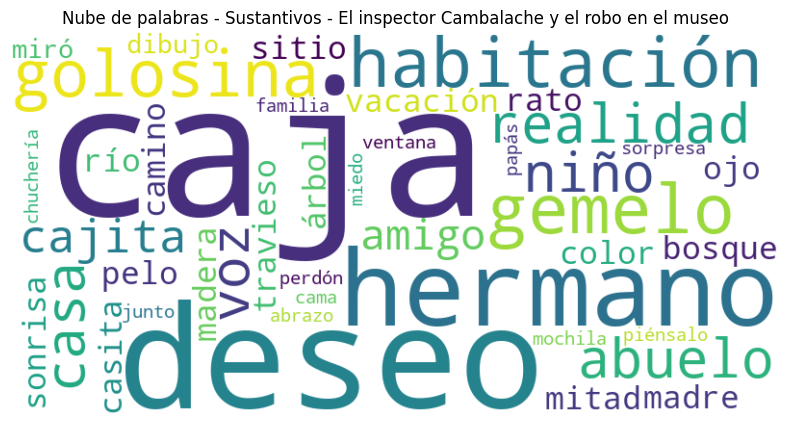


Verbos más frecuentes en 'El inspector Cambalache y el robo en el museo':
[('pedir', 5), ('hacer', 3), ('rabiar', 3), ('encontrar', 3), ('dejar', 3), ('brillar', 3), ('acercar', 3), ('abrir', 3), ('comer', 3), ('jugar', 2)]


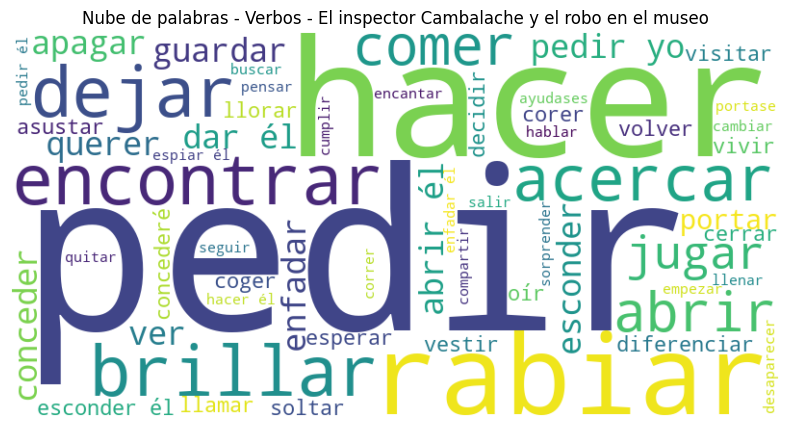


Adjetivos más frecuentes en 'El inspector Cambalache y el robo en el museo':
[('mágico', 8), ('egoísta', 4), ('precioso', 3), ('tranquilo', 1), ('pequeño', 1), ('pintado', 1), ('antiguo', 1), ('dulce', 1), ('importante', 1), ('mágicamiguelito', 1)]


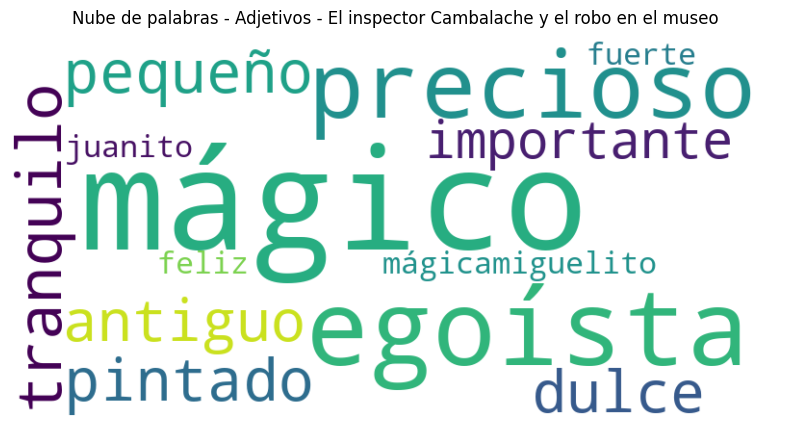


Sustantivos más frecuentes en 'Los dos gemelos y la caja mágica':
[('caja', 22), ('deseo', 12), ('hermano', 10), ('gemelo', 3), ('habitación', 3), ('golosina', 3), ('abuelo', 2), ('casa', 2), ('voz', 2), ('realidad', 2)]


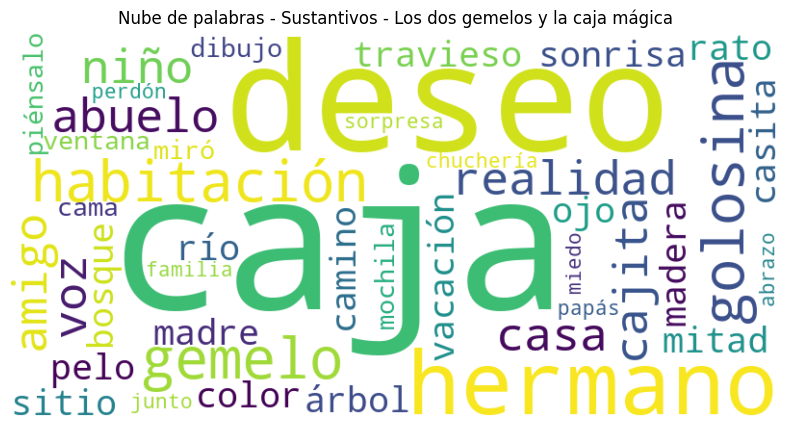


Verbos más frecuentes en 'Los dos gemelos y la caja mágica':
[('pedir', 5), ('hacer', 3), ('rabiar', 3), ('encontrar', 3), ('dejar', 3), ('brillar', 3), ('acercar', 3), ('abrir', 3), ('comer', 3), ('jugar', 2)]


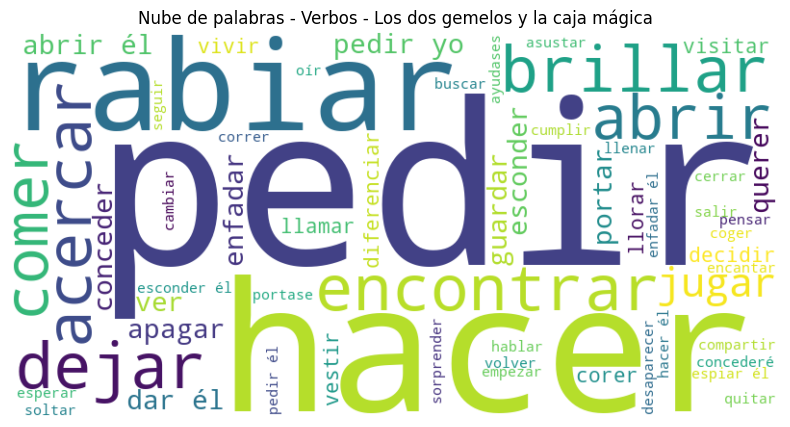


Adjetivos más frecuentes en 'Los dos gemelos y la caja mágica':
[('mágico', 8), ('egoísta', 4), ('precioso', 3), ('tranquilo', 1), ('pequeño', 1), ('pintado', 1), ('antiguo', 1), ('dulce', 1), ('importante', 1), ('mágicamiguelito', 1)]


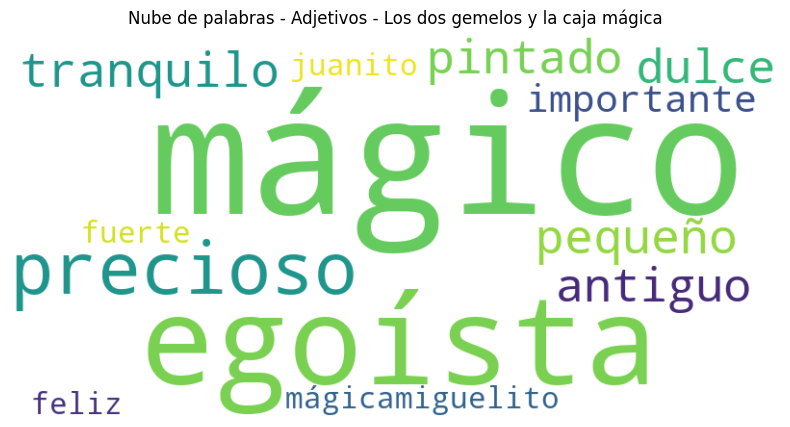

In [31]:
def analizar_pos(texto, nombre):
    doc = nlp(texto)
    sustantivos = [token.lemma_.lower() for token in doc if token.pos_ == "NOUN" and not token.is_stop and not token.is_punct and not token.is_space]
    verbos = [token.lemma_.lower() for token in doc if token.pos_ == "VERB" and not token.is_stop and not token.is_punct and not token.is_space]
    adjetivos = [token.lemma_.lower() for token in doc if token.pos_ == "ADJ" and not token.is_stop and not token.is_punct and not token.is_space]

    frecuencia_sustantivos = Counter(sustantivos)
    palabras_frecuentes_sustantivos = frecuencia_sustantivos.most_common(10)
    print(f"\nSustantivos más frecuentes en '{nombre}':")
    print(palabras_frecuentes_sustantivos)
    generar_nube_palabras(frecuencia_sustantivos, f"Sustantivos - {nombre}")

    frecuencia_verbos = Counter(verbos)
    palabras_frecuentes_verbos = frecuencia_verbos.most_common(10)
    print(f"\nVerbos más frecuentes en '{nombre}':")
    print(palabras_frecuentes_verbos)
    generar_nube_palabras(frecuencia_verbos, f"Verbos - {nombre}")

    frecuencia_adjetivos = Counter(adjetivos)
    palabras_frecuentes_adjetivos = frecuencia_adjetivos.most_common(10)
    print(f"\nAdjetivos más frecuentes en '{nombre}':")
    print(palabras_frecuentes_adjetivos)
    generar_nube_palabras(frecuencia_adjetivos, f"Adjetivos - {nombre}")

analizar_pos(texto_normalizado_Cambalache, "El inspector Cambalache y el robo en el museo")
analizar_pos(texto_normalizado_Caja, "Los dos gemelos y la caja mágica")

Este bloque de código define la función analizar_pos, que hace un análisis morfosintáctico de un texto utilizando spaCy. La función se enfoca en tres categorías de palabras: sustantivos, verbos y adjetivos. Para cada categoría, se extraen los lemas de las palabras que no sean stopwords, puntuación ni espacios, y luego se cuenta la frecuencia de aparición usando Counter. Después, imprime las 10 palabras más frecuentes de cada categoría y genera nubes de palabras para visualizarlas.

Al aplicarlo a los textos texto_normalizado_Cambalache y texto_normalizado_Caja, los resultados muestran lo siguiente:

Para “El inspector Cambalache y el robo en el museo”:

Sustantivos más frecuentes:
caja (22), deseo (12), hermano (10), gemelo (3), habitación (3), golosina (3), abuelo (2), casa (2), voz (2), realidad (2)
→ Esto indica que la historia se centra en objetos (caja), relaciones familiares (hermano, abuelo, gemelo) y deseos o elementos mágicos.

Verbos más frecuentes:
pedir (5), hacer (3), rabiar (3), encontrar (3), dejar (3), brillar (3), acercar (3), abrir (3), comer (3), jugar (2)
→ Los personajes interactúan activamente con el entorno, pidiendo cosas, haciendo acciones mágicas o cotidianas, y explorando objetos como la caja.

Adjetivos más frecuentes:
mágico (8), egoísta (4), precioso (3), tranquilo (1), pequeño (1), pintado (1), antiguo (1), dulce (1), importante (1), mágicamiguelito (1)
→ La narrativa tiene un tono de fantasía, con énfasis en lo mágico y lo estéticamente atractivo, además de características de los personajes.

Para “Los dos gemelos y la caja mágica”:

Sustantivos más frecuentes: idénticos al anterior: caja (22), deseo (12), hermano (10), etc.

Verbos más frecuentes: idénticos: pedir (5), hacer (3), rabiar (3), etc.

Adjetivos más frecuentes: idénticos: mágico (8), egoísta (4), precioso (3), etc.

Esto refleja que ambas historias comparten los mismos elementos centrales: la caja mágica, los deseos, los hermanos/gemelos, y un tono mágico y fantasioso, con acciones recurrentes como pedir, hacer o abrir, mostrando que los temas y personajes se enfocan en la magia, la familia y la interacción con objetos especiales.

In [ ]:
def extraer_svo(texto):
    doc = nlp(texto)
    tripletas = []
    for sent in doc.sents:
        sujeto = None
        verbo = None
        objeto = None
        for token in sent:
            if token.dep_ in ["nsubj", "nsubjpass"]:
                sujeto = token.lemma_.lower()
            elif token.pos_ == "VERB":
                verbo = token.lemma_.lower()
                for child in token.children:
                    if child.dep_ in ["dobj", "iobj", "pobj"]:
                        objeto = child.lemma_.lower()
                        break  # Tomamos el primer objeto directo o indirecto que encontramos
        if sujeto and verbo:
            tripletas.append((sujeto, verbo, objeto))
    return tripletas

# Extraer tripletas de ambos textos
tripletas_cambalache = extraer_svo(texto_normalizado_Cambalache)
print("\nTripletas SVO encontradas en 'El inspector Cambalache y el robo en el museo':")
for triplete in tripletas_cambalache[:10]:  # Mostrar las primeras 10
    print(triplete)

tripletas_caja = extraer_svo(texto_normalizado_Caja)
print("\nTripletas SVO encontradas en 'Los dos gemelos y la caja mágica':")
for triplete in tripletas_caja[:10]:  # Mostrar las primeras 10
    print(triplete)


Tripletas SVO encontradas en 'El inspector Cambalache y el robo en el museo':
('hermano', 'brillar', 'él')

Tripletas SVO encontradas en 'Los dos gemelos y la caja mágica':
('hermano', 'brillar', 'él')


Este código define la función extraer_svo, que analiza un texto con spaCy para identificar tripletas Sujeto-Verbo-Objeto (SVO) en cada oración. Recorre cada oración y, para cada token, asigna como sujeto los tokens con dependencia nsubj o nsubjpass, como verbo los tokens de tipo VERB, y como objeto los hijos del verbo con dependencia dobj, iobj o pobj, tomando solo el primer objeto encontrado. Si se detecta al menos un sujeto y un verbo, se agrega la tripleta a la lista. Al aplicar la función a los textos texto_normalizado_Cambalache y texto_normalizado_Caja, se obtiene como ejemplo la tripleta ('hermano', 'brillar', 'él') en ambos casos, lo que indica que en cada historia aparece la acción de “brillar” realizada por un “hermano” sobre “él”, mostrando un patrón narrativo compartido en ambos textos.

In [ ]:
def calcular_diversidad_lexica(tokens):
    total_tokens = len(tokens)
    unique_tokens = len(set(tokens))
    if total_tokens > 0:
        return unique_tokens / total_tokens
    else:
        return 0

# Calcular la diversidad léxica para ambos textos (usando los tokens del Paso 5)
diversidad_cambalache = calcular_diversidad_lexica(tokens_cambalache)
print(f"Diversidad léxica de 'El inspector Cambalache y el robo en el museo': {diversidad_cambalache:.4f}")

diversidad_caja = calcular_diversidad_lexica(tokens_caja)
print(f"Diversidad léxica de 'Los dos gemelos y la caja mágica': {diversidad_caja:.4f}")

Diversidad léxica de 'El inspector Cambalache y el robo en el museo': 0.5060
Diversidad léxica de 'Los dos gemelos y la caja mágica': 0.5060


Este código define la función calcular_diversidad_lexica, que mide la variedad de palabras en un texto dividiendo el número de tokens únicos entre el total de tokens. Primero calcula total_tokens y unique_tokens, y si el texto tiene palabras, devuelve la proporción de vocabulario único; de lo contrario, devuelve 0. Al aplicar esta función a los tokens de los textos normalizados, se obtiene que ambos textos, “El inspector Cambalache y el robo en el museo” y “Los dos gemelos y la caja mágica”, tienen una diversidad léxica de 0.5060, indicando que aproximadamente la mitad de las palabras en cada historia son únicas, lo que refleja un nivel moderado de variedad en el vocabulario utilizado.


Frecuencia de la longitud de las palabras en 'El inspector Cambalache y el robo en el museo':
[(6, 53), (5, 52), (7, 49), (4, 30), (8, 25), (9, 19), (3, 7), (10, 6), (11, 5), (13, 2), (2, 2), (15, 1)]


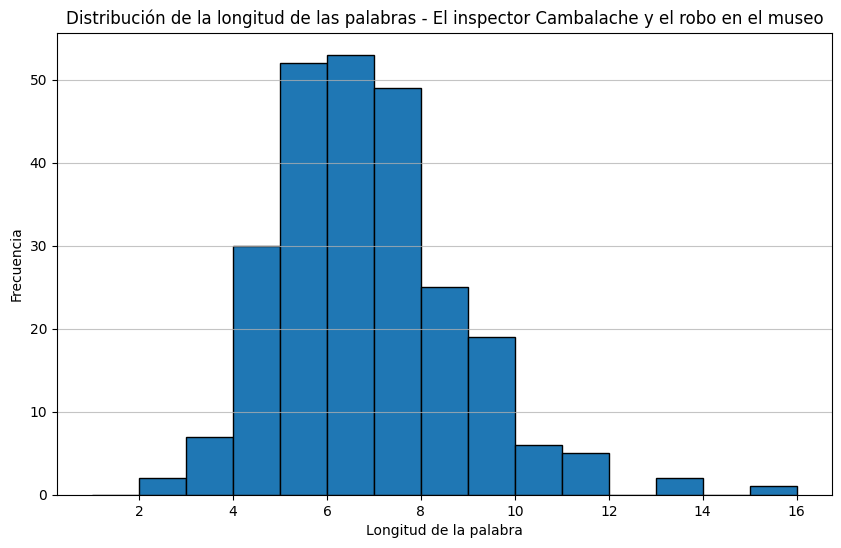


Frecuencia de la longitud de las palabras en 'Los gemelos y la caja magica':
[(6, 53), (5, 52), (7, 49), (4, 30), (8, 25), (9, 19), (3, 7), (10, 6), (11, 5), (13, 2), (2, 2), (15, 1)]


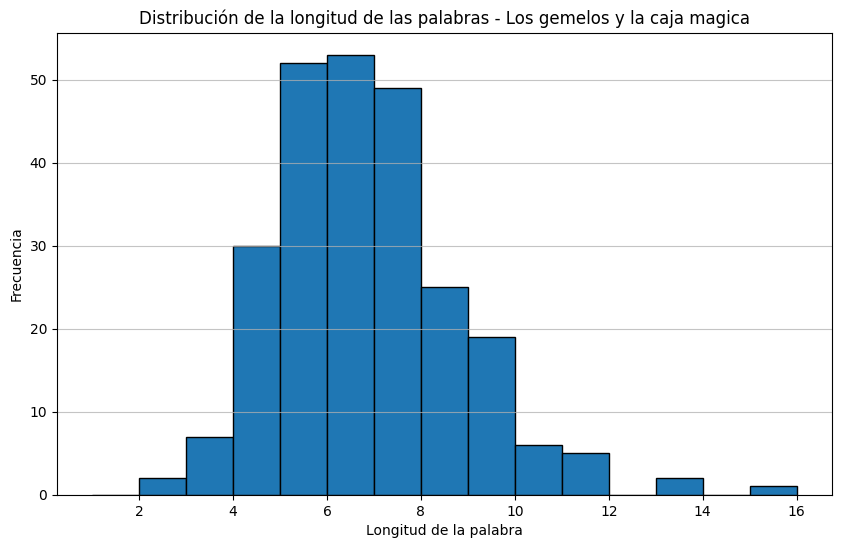

In [35]:
from collections import Counter
import matplotlib.pyplot as plt

def analizar_longitud_palabras(tokens, nombre):
    longitudes = [len(token) for token in tokens]
    frecuencia_longitudes = Counter(longitudes)

    print(f"\nFrecuencia de la longitud de las palabras en '{nombre}':")
    print(frecuencia_longitudes.most_common())

    # Visualizar la distribución
    plt.figure(figsize=(10, 6))
    plt.hist(longitudes, bins=range(1, max(longitudes) + 2), edgecolor='black')
    plt.title(f'Distribución de la longitud de las palabras - {nombre}')
    plt.xlabel('Longitud de la palabra')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Analizar la longitud de las palabras para ambos textos (usando los tokens del Paso 5)
analizar_longitud_palabras(tokens_cambalache, "El inspector Cambalache y el robo en el museo")
analizar_longitud_palabras(tokens_caja, "Los gemelos y la caja magica")

Este código define la función analizar_longitud_palabras, que examina la longitud de las palabras en un texto a partir de su lista de tokens. Calcula la longitud de cada palabra, obtiene la frecuencia de cada longitud con Counter e imprime los resultados ordenados. Además, genera un histograma que muestra visualmente cómo se distribuyen las palabras según su número de caracteres. Al aplicar la función a los tokens de “El inspector Cambalache y el robo en el museo” y “Los gemelos y la caja mágica”, se observa que la mayoría de palabras tienen entre 5 y 7 caracteres, con frecuencias máximas de 53 (6 letras), 52 (5 letras) y 49 (7 letras), y algunas palabras más largas hasta de 15 caracteres. Esto indica que ambos textos utilizan predominantemente palabras de longitud media, con pocas palabras muy cortas o muy largas, mostrando un patrón consistente en la estructura léxica de las historias.